<a href="https://colab.research.google.com/github/dTony33/Machine-Learning/blob/main/Machine_Learning_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/soerenab/AudioMNIST


fatal: destination path 'AudioMNIST' already exists and is not an empty directory.


In [3]:
import os
import numpy as np
import json
import librosa
import pandas as pd
import glob
import librosa.display as dsp
import scipy.io.wavfile as wavf
import scipy.signal
import h5py
from sklearn.preprocessing import StandardScaler

from IPython.display import Audio, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# data = os.dir

In [3]:
# data = map[(os.path.join('/content/AudioMNIST/data', folder),os.path.join('/content/AudioMNIST/data_processed', folder),
# '/content/AudioMNIST/data/audioMNIST_meta.txt') for folder in sorted(folders)]

In [4]:
# import glob
# for i in folders:
#   for filepath in sorted(glob.glob(os.path.join('/content/AudioMNIST/data'+ i, "*.wav"))):

#         # infer sample info from name
#         dig, vp, rep = filepath.rstrip(".wav").split("/")[-1].split("_")

#         print(dig,vp,rep)

In [4]:
def get_audio(digit=0):
    # Audio Sample Directory
    sample = np.random.randint(1,60)
    # Index of Audio
    index = np.random.randint(1,5)
    
    # Modified file location
    if sample<10:
        file = f"/content/AudioMNIST/data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"/content/AudioMNIST/data/{sample}/{digit}_{sample}_{index}.wav"

    
    # Get Audio from the location
    data,sample_rate = librosa.load(file)
    
    # Plot the audio wave
    dsp.waveshow(data,sr=sample_rate)
    plt.show()
    x= librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))

    dsp.specshow(xdb,sr = sample_rate)
    plt.show()
    
    # Show the widget
    return Audio(data=data,rate=sample_rate)

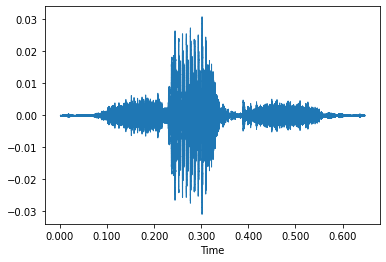

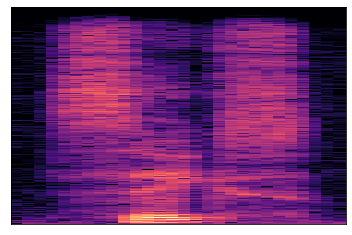

In [5]:
get_audio(6)

In [6]:
import re
def data(file_path):
  
  meta_info = json.load(open('/content/AudioMNIST/data/audioMNIST_meta.txt'))
  folders = []
  preprocessed = []
  for folder in os.listdir(file_path):
        # print(folder)
        # only process folders
        if not os.path.isdir(os.path.join(file_path, folder)):
            continue
        folders.append(folder)
  for i in folders:
    for filepath in sorted(glob.glob(os.path.join(file_path+ '/' +i))):
      for audio_file in sorted(glob.glob(os.path.join(filepath,"*.wav"))):
        length, data_arrays = wavf.read(audio_file)
        #digit, folder, number
        digit,folder,number = audio_file.rstrip(".wav").split("/")[-1].split("_")
        # digit,n = re.subn('\\\\[0-9]', '', digit)
        # print(digit)
        data = librosa.core.resample(y = data_arrays.astype(np.float32),orig_sr = length,target_sr=8000,res_type = 'scipy')
        #transforming data for padding
        if len(data)==8000:
          transformed_Data = data
        if len(data) > 8000:
          pass
        if len(data) < 8000:
          #broadcasting
          transformed_Data = np.zeros(8000)
          off = np.random.randint(low=0,high = 8000 -len(data))
          transformed_Data[off:off+len(data)] = data
        if meta_info[folder]["gender"] == "male":
          gender = 0
        else:
          gender = 1
        preprocessed.append([transformed_Data,digit,gender])
  return preprocessed

In [8]:
preprocessed  = data('/content/AudioMNIST/data')


In [9]:
def fourier_transform(transformed_Data):
  
   _,_, stft = scipy.signal.stft(transformed_Data,8000,nperseg =455,noverlap = 420, window = 'hann')
   stft = np.abs(stft[0:227, 2:-1])
   stft = np.atleast_3d(stft)
  #  stft = np.mean(stft.T,axis = 0)
   # convert to decibel
   stft = librosa.amplitude_to_db(stft, ref = np.max)
  #  tmp_X = np.zeros([1, 1, 227, 227])
  #  tmp_X[0, 0] = stft
  #  final_array = tmp_X
   return stft

def waveform(transformed_Data):
  data = transformed_Data
  data /= (np.percentile(transformed_Data, 95) + 0.001)

  return data

In [10]:
alexnet = []

for i in range(len(preprocessed)):
  fourier = fourier_transform(preprocessed[i][0])
  alexnet.append([fourier,int(preprocessed[i][1]),preprocessed[i][2]])




In [11]:
audio_waves = []
for i in range(len(preprocessed)):
  waves = waveform(preprocessed[i][0])
  audio_waves.append([waves,int(preprocessed[i][1]),preprocessed[i][2]]) 

In [12]:
alexnet_df = pd.DataFrame(alexnet, columns = ['features','class_digit','class_gender'])

In [13]:
waveform_df = pd.DataFrame(audio_waves, columns = ['features','class_digit','class_gender'])

In [17]:
# alex_array = alexnet_df.values.tolist()
# audio_array = waveform_df.values.tolist()

In [18]:
# train_alex,validate_alex,test_alex = np.split(alex_array, [int(.6*len(alex_array)),int(.8*len(alex_array))])
# arr, yg_train_alex = np.split(train_alex,[-1],axis =1)
# x_train_alex,y_train_alex = np.split(arr,[-1],axis =1)
# val, yg_validate_alex = np.split(validate_alex,[-1],axis =1)
# x_validate_alex,y_validate_alex = np.split(val,[-1],axis =1)
# tst, yg_test_alex = np.split(test_alex,[-1],axis =1)
# x_test_alex,y_test_alex = np.split(tst,[-1],axis =1)

In [19]:
# train_audio,validate_audio,test_audio = np.split(audio_array, [int(.6*len(audio_array)),int(.8*len(audio_array))])
# arr, yg_train_audio = np.split(train_audio,[-1],axis =1)
# x_train_audio,y_train_audio = np.split(arr,[-1],axis =1)
# val, yg_validate_audio = np.split(validate_audio,[-1],axis =1)
# x_validate_audio,y_validate_audio = np.split(val,[-1],axis =1)
# tst, yg_test_audio = np.split(test_audio,[-1],axis =1)
# x_test_audio,y_test_audio = np.split(tst,[-1],axis =1)


In [20]:
# arr, gen = np.split(t,[-1],axis =1)
# arr,dig = np.split(arr,[-1],axis =1)
# print(arr[634],gen[634],dig[634])

In [14]:
X = np.array(alexnet_df['features'].to_list())
y = np.array(alexnet_df['class_digit'].to_list())
yg = np.array(alexnet_df['class_gender'].to_list())

In [15]:
X_audio_wf = np.array(waveform_df['features'].to_list())
y_audio_wf = np.array(waveform_df['class_digit'].to_list())
yg_audio_wf = np.array(waveform_df['class_gender'].to_list())

In [16]:
X_train_al, X_test_al, y_train_al, y_test_al  = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_al, X_val_al, y_train_al, y_val_al = train_test_split(X_train_al, y_train_al, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [17]:
X_train_al2, X_test_al2, y_train_al2, y_test_al2  = train_test_split(X, yg, test_size=0.2, random_state=1)

X_train_al2, X_val_al2, y_train_al2, y_val_al2 = train_test_split(X_train_al2, y_train_al2, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [18]:
X_train_an, X_test_an, y_train_an, y_test_an  = train_test_split(X_audio_wf, y_audio_wf, test_size=0.2, random_state=1)

X_train_an, X_val_an, y_train_an, y_val_an = train_test_split(X_train_an, y_train_an, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [19]:
X_train_an2, X_test_an2, y_train_an2, y_test_an2  = train_test_split(X_audio_wf, yg_audio_wf, test_size=0.2, random_state=1)

X_train_an2, X_val_an2, y_train_an2, y_val_an2 = train_test_split(X_train_an2, y_train_an2, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [27]:
X_train_an =  X_train_an.reshape(18000,8000,1,1)
X_test_an =  X_test_an.reshape(6000,8000,1,1)
X_train_an2 =  X_train_an2.reshape(18000,8000,1,1)
X_test_an2 =  X_test_an2.reshape(6000,8000,1,1)
X_val_an = X_val_an.reshape(6000,8000,1,1)
X_val_an2 = X_val_an2.reshape(6000,8000,1,1)

In [26]:
X_val_an.shape

(6000, 8000)

In [21]:
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.layers import Dense, Dropout

# To create a checkpoint and save the best model
from keras.callbacks import ModelCheckpoint

# To load the model
from keras.models import load_model

# To check the metrics of the model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [31]:
# inputs = np.concatenate((X_train_al, X_test_al), axis=0)
# targets = np.concatenate((y_train_al, y_test_al), axis=0)
# from sklearn.model_selection import KFold
# # Define the K-fold Cross Validator
# kfold = KFold(n_splits=5, shuffle=True)
# acc_per_fold = []
# loss_per_fold = []
# # K-fold Cross Validation model evaluation
# fold_no = 1
# for train, test in kfold.split(inputs, targets):
#   # Define the model architecture
#   model_alexnet = keras.Sequential()
#   model_alexnet.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
#                         strides=(4, 4), activation="relu", 
#                         input_shape=(227,227,1)))
#   model_alexnet.add(layers.BatchNormalization())
#   model_alexnet.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
#   model_alexnet.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
#                         strides=(1, 1), activation="relu", 
#                         padding="same"))
#   model_alexnet.add(layers.BatchNormalization())
#   model_alexnet.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
#   model_alexnet.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
#                         strides=(1, 1), activation="relu", 
#                         padding="same"))
#   model_alexnet.add(layers.BatchNormalization())
#   model_alexnet.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
#                         strides=(1, 1), activation="relu", 
#                         padding="same"))
#   model_alexnet.add(layers.BatchNormalization())
#   model_alexnet.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
#                         strides=(1, 1), activation="relu", 
#                         padding="same"))
#   model_alexnet.add(layers.BatchNormalization())
#   model_alexnet.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
#   model_alexnet.add(layers.Flatten())
#   model_alexnet.add(layers.Dense(1024, activation="relu"))
#   model_alexnet.add(layers.Dropout(0.5))
#   model_alexnet.add(layers.Dense(10, activation="softmax"))
#   model_alexnet.compile(loss='sparse_categorical_crossentropy', 
#               optimizer=tf.optimizers.SGD(lr=0.01), 
#               metrics=['accuracy'])

#   model_alexnet.summary()



#   # Generate a print
#   print('------------------------------------------------------------------------')
#   print(f'Training for fold {fold_no} ...')

#   # Fit data to model
#   history = model_alexnet.fit(inputs[train], targets[train],
#               batch_size=10000,
#               epochs=50,
#               verbose=0)
# # model_alexnet.fit(x_train_alex,y_train_alex, validation_data=(x_validate_alex,y_validate_alex),epochs = 12,batch_size=25)
#   # Generate generalization metrics
#   scores = model_alexnet.evaluate(inputs[test], targets[test], verbose=0)
#   print(f'Score for fold {fold_no}: {model_alexnet.metrics_names[0]} of {scores[0]}; {model_alexnet.metrics_names[1]} of {scores[1]*100}%')
#   acc_per_fold.append(scores[1] * 100)
#   loss_per_fold.append(scores[0])

#   # Increase fold number
#   fold_no = fold_no + 1

In [39]:
model_alexnet = keras.Sequential()
model_alexnet.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(227,227,1)))
model_alexnet.add(layers.BatchNormalization())
model_alexnet.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model_alexnet.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet.add(layers.BatchNormalization())
model_alexnet.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet.add(layers.BatchNormalization())
model_alexnet.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet.add(layers.BatchNormalization())
model_alexnet.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet.add(layers.BatchNormalization())
model_alexnet.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet.add(layers.Flatten())
model_alexnet.add(layers.Dense(1024, activation="relu"))
model_alexnet.add(layers.Dropout(0.5))
model_alexnet.add(layers.Dense(10, activation="softmax"))
model_alexnet.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.01), 
              metrics=['accuracy'])

model_alexnet.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 55, 55, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [40]:
model_alexnet2 = keras.Sequential()
model_alexnet2.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(227, 227, 1)))
model_alexnet2.add(layers.BatchNormalization())
model_alexnet2.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model_alexnet2.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet2.add(layers.BatchNormalization())
model_alexnet2.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet2.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet2.add(layers.BatchNormalization())
model_alexnet2.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet2.add(layers.BatchNormalization())
model_alexnet2.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet2.add(layers.BatchNormalization())
model_alexnet2.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet2.add(layers.Flatten())
model_alexnet2.add(layers.Dense(1024, activation="relu"))
model_alexnet2.add(layers.Dropout(0.5))
model_alexnet2.add(layers.Dense(2, activation="softmax"))
model_alexnet2.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.01), 
              metrics=['accuracy'])

model_alexnet2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 55, 55, 96)        11712     
                                                                 
 batch_normalization_5 (Batc  (None, 55, 55, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [41]:
model_alexnet.fit(X_train_al,y_train_al, validation_data=(X_val_al,y_val_al),epochs = 25,batch_size=1000)
model_alexnet2.fit(X_train_al2,y_train_al2, validation_data=(X_val_al2,y_val_al2),epochs = 25,batch_size=1000)

Epoch 1/25
18/18 [==============================] - 11s 411ms/step - loss: 3.8546 - accuracy: 0.4616 - val_loss: 8.9258 - val_accuracy: 0.0942
Epoch 2/25
18/18 [==============================] - 4s 203ms/step - loss: 0.5707 - accuracy: 0.8225 - val_loss: 6.4476 - val_accuracy: 0.0942
Epoch 3/25
18/18 [==============================] - 4s 202ms/step - loss: 0.3203 - accuracy: 0.9061 - val_loss: 5.6642 - val_accuracy: 0.0945
Epoch 4/25
18/18 [==============================] - 4s 201ms/step - loss: 0.2166 - accuracy: 0.9383 - val_loss: 4.7795 - val_accuracy: 0.0858
Epoch 5/25
18/18 [==============================] - 4s 199ms/step - loss: 0.1618 - accuracy: 0.9530 - val_loss: 4.2287 - val_accuracy: 0.0870
Epoch 6/25
18/18 [==============================] - 4s 201ms/step - loss: 0.1237 - accuracy: 0.9663 - val_loss: 3.6183 - val_accuracy: 0.1370
Epoch 7/25
18/18 [==============================] - 4s 200ms/step - loss: 0.0993 - accuracy: 0.9737 - val_loss: 3.0644 - val_accuracy: 0.1802
Epoch

In [42]:
y_pred_digit = model_alexnet.predict(X_test_al)
y_pred_digit = [np.argmax(i) for i in y_pred_digit]
print(classification_report(y_test_al,y_pred_digit))

188/188 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       614
           1       0.99      1.00      0.99       581
           2       0.99      0.99      0.99       583
           3       0.99      1.00      1.00       612
           4       0.99      0.99      0.99       584
           5       0.99      0.99      0.99       598
           6       0.99      0.99      0.99       579
           7       1.00      0.99      0.99       623
           8       0.99      0.99      0.99       620
           9       1.00      0.99      0.99       606

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [43]:
y_pred_digit_2 = model_alexnet.predict(X_test_al2)
y_pred_digit_2 = [np.argmax(i) for i in y_pred_digit_2]
print(classification_report(y_test_al2,y_pred_digit_2))

188/188 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.81      0.10      0.18      4835
           1       0.18      0.09      0.12      1165
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10      6000
   macro avg       0.10      0.02      0.03      6000
weighted avg       0.69      0.10      0.17      6000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


conv3-100,
maxpool2, conv3-64, maxpool2, conv3-128, maxpool2, conv3-128,
maxpool2, conv3-128, maxpool2, conv3-128, maxpool2, FC-1024
FC-512, FC-10 (digit classification) or FC-2 (gender classification).

In [22]:

model_audionet = keras.Sequential()
model_audionet.add(layers.Conv2D(filters=100, kernel_size=(3,1),
                        strides=1, activation="relu", padding='same',
                        input_shape=(8000,1,1)))
# model_audionet.add(layers.BatchNormalization())
model_audionet.add(layers.MaxPool2D(strides= (2, 2),pool_size=(3,1)))
model_audionet.add(layers.Conv2D(filters=64, kernel_size=(3,1), 
                        strides=1, activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2),pool_size=(3,1)))
model_audionet.add(layers.Conv2D(filters=128, kernel_size=(3,1), 
                        strides=1, activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides= (2, 2),pool_size=(3,1)))
model_audionet.add(layers.Conv2D(filters=128, kernel_size=(3,1), 
                        strides=1, activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides= (2, 2),pool_size=(3,1)))
model_audionet.add(layers.Conv2D(filters=128, kernel_size=(3,1), 
                        strides=1, activation="relu",
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2),pool_size=(3,1)))
model_audionet.add(layers.Conv2D(filters=128, kernel_size=(3,1), 
                        strides=1, activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2),pool_size=(3,1)))
model_audionet.add(layers.Flatten())
model_audionet.add(layers.Dense(1024, activation="relu"))
model_audionet.add(layers.Dense(1024, activation="relu"))
model_audionet.add(layers.Dropout(0.5))
model_audionet.add(layers.Dense(10, activation="softmax"))
model_audionet.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.01), 
              metrics=['accuracy'])

model_audionet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8000, 1, 100)      400       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3999, 1, 100)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3999, 1, 64)       19264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1999, 1, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1999, 1, 128)      24704     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 999, 1, 128)      0

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [35]:
model_audionet.fit(X_train_an,y_train_an, validation_data=(X_val_an,y_val_an),epochs = 25,batch_size=1000)

Epoch 1/25
18/18 [==============================] - 3s 184ms/step - loss: nan - accuracy: 0.1012 - val_loss: nan - val_accuracy: 0.0948
Epoch 2/25
18/18 [==============================] - 3s 169ms/step - loss: nan - accuracy: 0.1009 - val_loss: nan - val_accuracy: 0.0948
Epoch 3/25
18/18 [==============================] - 3s 170ms/step - loss: nan - accuracy: 0.1009 - val_loss: nan - val_accuracy: 0.0948
Epoch 4/25
18/18 [==============================] - 3s 169ms/step - loss: nan - accuracy: 0.1009 - val_loss: nan - val_accuracy: 0.0948
Epoch 5/25
18/18 [==============================] - 3s 168ms/step - loss: nan - accuracy: 0.1009 - val_loss: nan - val_accuracy: 0.0948
Epoch 6/25
18/18 [==============================] - 3s 170ms/step - loss: nan - accuracy: 0.1009 - val_loss: nan - val_accuracy: 0.0948
Epoch 7/25
18/18 [==============================] - 3s 169ms/step - loss: nan - accuracy: 0.1009 - val_loss: nan - val_accuracy: 0.0948
Epoch 8/25
18/18 [==============================

In [36]:
y_pred_digit_an = model_audionet.predict(X_test_an)
y_pred_digit_an = [np.argmax(i) for i in y_pred_digit_an]
print(classification_report(y_test_an,y_pred_digit_an))

188/188 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.10      1.00      0.19       614
           1       0.00      0.00      0.00       581
           2       0.00      0.00      0.00       583
           3       0.00      0.00      0.00       612
           4       0.00      0.00      0.00       584
           5       0.00      0.00      0.00       598
           6       0.00      0.00      0.00       579
           7       0.00      0.00      0.00       623
           8       0.00      0.00      0.00       620
           9       0.00      0.00      0.00       606

    accuracy                           0.10      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.10      0.02      6000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
model_audionet = keras.Sequential()
model_audionet.add(layers.Conv2D(filters=100, kernel_size=(3,1),
                        strides=1, activation="relu", padding='same',
                        input_shape=(8000,1,1)))
# model_audionet.add(layers.BatchNormalization())
model_audionet.add(layers.MaxPool2D(strides= (2, 2),pool_size=(3,1)))
model_audionet.add(layers.Conv2D(filters=64, kernel_size=(3,1), 
                        strides=1, activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2),pool_size=(3,1)))
model_audionet.add(layers.Conv2D(filters=128, kernel_size=(3,1), 
                        strides=1, activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides= (2, 2),pool_size=(3,1)))
model_audionet.add(layers.Conv2D(filters=128, kernel_size=(3,1), 
                        strides=1, activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides= (2, 2),pool_size=(3,1)))
model_audionet.add(layers.Conv2D(filters=128, kernel_size=(3,1), 
                        strides=1, activation="relu",
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2),pool_size=(3,1)))
model_audionet.add(layers.Conv2D(filters=128, kernel_size=(3,1), 
                        strides=1, activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2),pool_size=(3,1)))
model_audionet.add(layers.Flatten())
model_audionet.add(layers.Dense(1024, activation="relu"))
model_audionet.add(layers.Dense(1024, activation="relu"))
model_audionet.add(layers.Dropout(0.5))
model_audionet.add(layers.Dense(2, activation="softmax"))
model_audionet.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.01), 
              metrics=['accuracy'])

model_audionet.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 8000, 1, 100)      400       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3999, 1, 100)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3999, 1, 64)       19264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1999, 1, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 1999, 1, 128)      24704     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 999, 1, 128)     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [37]:
model_audionet.fit(X_train_an2,y_train_an2, validation_data=(X_val_an2,y_val_an2),epochs = 25,batch_size=1000)

Epoch 1/25
18/18 [==============================] - 3s 179ms/step - loss: nan - accuracy: 0.7966 - val_loss: nan - val_accuracy: 0.8045
Epoch 2/25
18/18 [==============================] - 3s 169ms/step - loss: nan - accuracy: 0.7966 - val_loss: nan - val_accuracy: 0.8045
Epoch 3/25
18/18 [==============================] - 3s 170ms/step - loss: nan - accuracy: 0.7966 - val_loss: nan - val_accuracy: 0.8045
Epoch 4/25
18/18 [==============================] - 3s 168ms/step - loss: nan - accuracy: 0.7966 - val_loss: nan - val_accuracy: 0.8045
Epoch 5/25
18/18 [==============================] - 3s 169ms/step - loss: nan - accuracy: 0.7966 - val_loss: nan - val_accuracy: 0.8045
Epoch 6/25
18/18 [==============================] - 3s 169ms/step - loss: nan - accuracy: 0.7966 - val_loss: nan - val_accuracy: 0.8045
Epoch 7/25
18/18 [==============================] - 3s 169ms/step - loss: nan - accuracy: 0.7966 - val_loss: nan - val_accuracy: 0.8045
Epoch 8/25
18/18 [==============================

In [38]:
y_pred_digit_an2 = model_audionet.predict(X_test_an2)
y_pred_digit_an2 = [np.argmax(i) for i in y_pred_digit_an2]
print(classification_report(y_test_an2,y_pred_digit_an2))

188/188 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4835
           1       0.00      0.00      0.00      1165

    accuracy                           0.81      6000
   macro avg       0.40      0.50      0.45      6000
weighted avg       0.65      0.81      0.72      6000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
pip install git+https://github.com/paulgavrikov/visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-arf_v76t
  Running command git clone -q https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-arf_v76t
     |████████████████████████████████| 992 kB 4.7 MB/s 
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13450 sha256=904d9d53e17a43dd6673dd54bc5edcd5b8dac09998373d84a56702ac14c4d035
  Stored in directory: /tmp/pip-ephem-wheel-cache-ftpz4mmj/wheels/e6/fe/80/74c54ccb79205ab57079259bc349e1629373e811e1c82ed535
Successfully built visualkeras


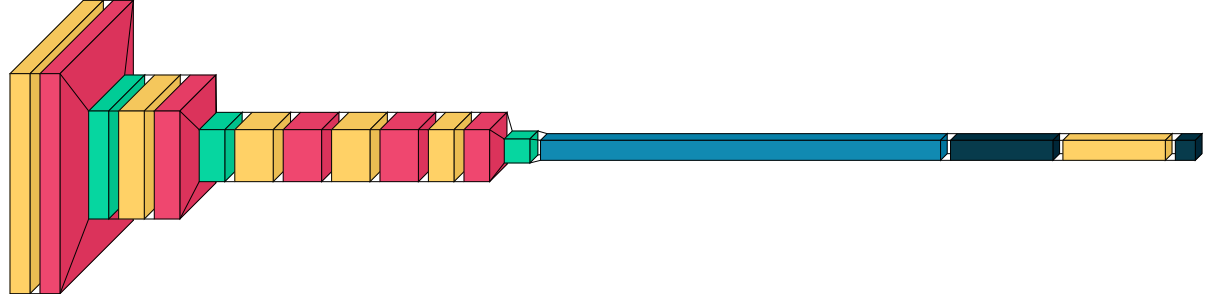

In [48]:
import visualkeras
visualkeras.layered_view(model_alexnet)

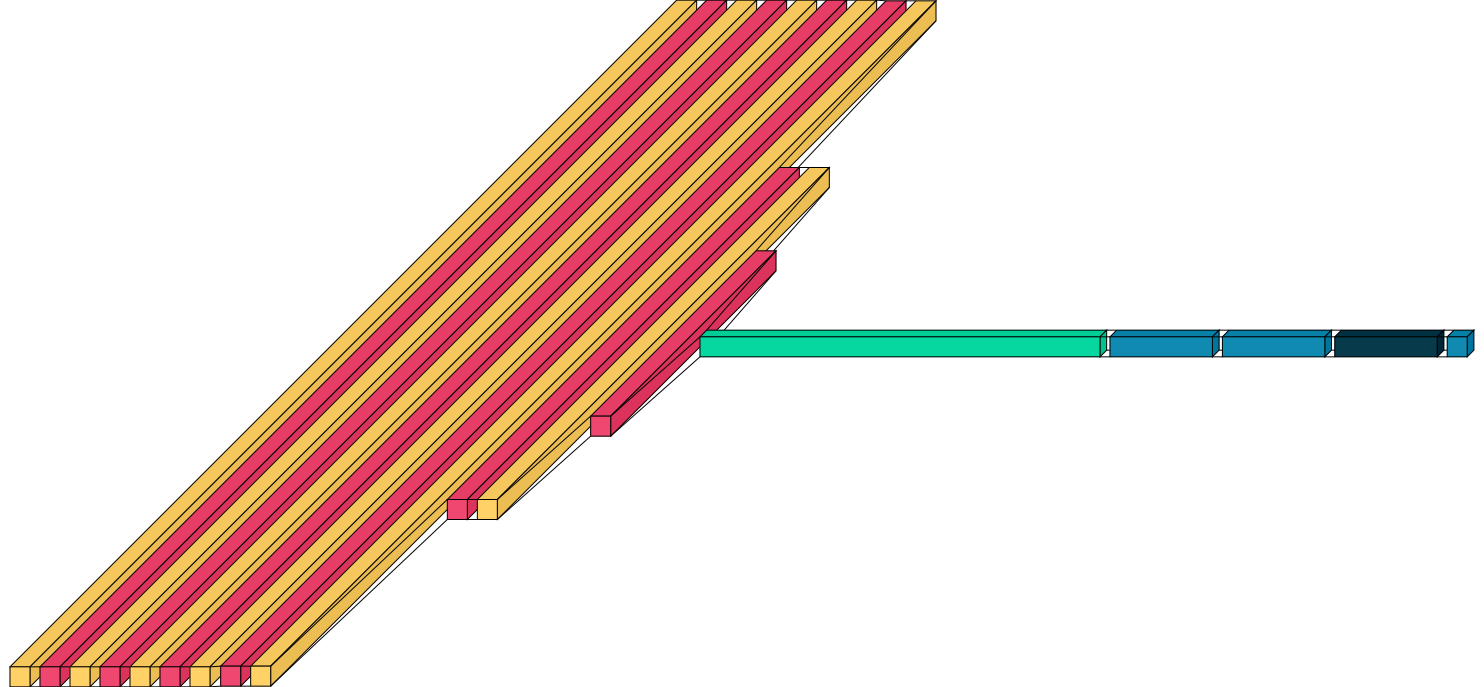

In [49]:
visualkeras.layered_view(model_audionet)